# Data Project
## Authors: Ester Moiseyev 318692464, Yarden Dali 207220013


## The purpese of the project is to compare between this 2 models while fine tuning them about the israeli-palestinian conflict.

# The motivation:
### We wanted to confront questions, posts and news about the conflict according to information we've scraped from wikipedia.
### The main cause why we decided to collect the data from wikipedia is beacause we assumed it would be more reliable and normalized, and because it could offer us the amount of data we needed in order to investigate this issue.

### We scraped the information from wikipedia according to this topics [ "Arab–Israeli conflict","Israeli–Palestinian conflict","Israeli Declaration of Independence","Six-Day War","Gulf War","Israel–Hamas war","2006 Lebanon War", "1982 Lebanon War","2024 Iran–Israel conflict","Iran–Israel proxy conflict","Israel–Hezbollah conflict","Yom Kippur War","2014 Gaza War", "History of Israel","History of Palestine","2023 Hamas-led attack on Israel","2014 Gush Etzion kidnapping and murder","Temple Mount","First Intifada","Second Intifada","Munich massacre","Borders of Israel","Convoy of 35", "Palestine Liberation Organization","Abraham Accords","Oslo Accords","Mandatory Palestine"].

In this project we used the TinyLlama model with 1.1B params and the gpt2 model with 137M params.


In [ ]:
!pip install safetensors

In [ ]:
!pip install rouge

In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from transformers import pipeline, set_seed, GPT2LMHeadModel, GPT2Tokenizer, AutoModelForCausalLM, AutoTokenizer
from rouge import Rouge
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/כלים מתקדמים - יניב"

/content/drive/.shortcut-targets-by-id/1m0xVKBCsn5o6akRkMmsXp4O2PynUoJsg/כלים מתקדמים - יניב


#Part 1

##Information about the files:

In [ ]:
amount_of_docs = len(os.listdir('/content/drive/MyDrive/כלים מתקדמים - יניב/wikipedia_data'))
print(f"the number of documents collected from wikipedia is: {amount_of_docs}")


the number of documents collected from wikipedia is: 1717


In [ ]:
data = []
for filename in os.listdir('/content/drive/MyDrive/כלים מתקדמים - יניב/wikipedia_data'):
  if filename.endswith('.json'):
    with open(os.path.join('/content/drive/MyDrive/כלים מתקדמים - יניב/wikipedia_data', filename), 'r') as f:
      json_data = json.load(f)
      title = json_data.get('title')
      content = json_data.get('content')
      data.append({'title': title, 'content': content})

df = pd.DataFrame(data)


In [ ]:
df

,title,content
0,Ahmad Asiri (general),Major General Ahmad Hassan Mohammad Asiri Arab...
1,Air India,Air India is the flag carrier airline of India...
2,Albania–Israel relations,Albania has regnized Israel as a state since A...
3,Algeria–Israel relations,Algeria and Israel have no official diplomatic...
4,Algeria–Saudi Arabia relations,"Algeria and Saudi Arabia are, respectively, th..."
...,...,...
1712,2012 attacks on Israeli diplomats,The attacks on Israeli diplomats occurred on F...
1713,2019 Beirut drone crash,Lebanese and Hezbollah officials reported that...
1714,Israel–Saudi Arabia relations,The State of Israel and the Kingdom of Saudi A...
1715,Afghanistan–Israel relations,Afghanistan–Israel relations refer to the bila...


###Finding the number of words in each document

In [ ]:
df['num_words'] = df['content'].apply(lambda x: len(x.split()))


In [ ]:
df

,title,content,num_words
0,Ahmad Asiri (general),Major General Ahmad Hassan Mohammad Asiri Arab...,993
1,Air India,Air India is the flag carrier airline of India...,6013
2,Albania–Israel relations,Albania has regnized Israel as a state since A...,1275
3,Algeria–Israel relations,Algeria and Israel have no official diplomatic...,601
4,Algeria–Saudi Arabia relations,"Algeria and Saudi Arabia are, respectively, th...",524
...,...,...,...
1712,2012 attacks on Israeli diplomats,The attacks on Israeli diplomats occurred on F...,859
1713,2019 Beirut drone crash,Lebanese and Hezbollah officials reported that...,354
1714,Israel–Saudi Arabia relations,The State of Israel and the Kingdom of Saudi A...,2222
1715,Afghanistan–Israel relations,Afghanistan–Israel relations refer to the bila...,431


### Removing stop words

In [ ]:
def remove_stopwords(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

if not df.empty:
    df['Content_NoStopwords'] = df['content'].apply(remove_stopwords)
    df['NoStopwords_num_words'] = df['Content_NoStopwords'].apply(lambda x: len(x.split()))



In [ ]:
df

,title,content,num_words,Content_NoStopwords,NoStopwords_num_words
0,Ahmad Asiri (general),Major General Ahmad Hassan Mohammad Asiri Arab...,993,major general ahmad hassan mohammad asiri arab...,576
1,Air India,Air India is the flag carrier airline of India...,6013,air india flag carrier airline india owned air...,3609
2,Albania–Israel relations,Albania has regnized Israel as a state since A...,1275,albania regnized israel state since april dipl...,733
3,Algeria–Israel relations,Algeria and Israel have no official diplomatic...,601,algeria israel official diplomatic relations a...,343
4,Algeria–Saudi Arabia relations,"Algeria and Saudi Arabia are, respectively, th...",524,algeria saudi arabia respectively first send l...,316
...,...,...,...,...,...
1712,2012 attacks on Israeli diplomats,The attacks on Israeli diplomats occurred on F...,859,attacks israeli diplomats occurred february bo...,497
1713,2019 Beirut drone crash,Lebanese and Hezbollah officials reported that...,354,lebanese hezbollah officials reported local ti...,220
1714,Israel–Saudi Arabia relations,The State of Israel and the Kingdom of Saudi A...,2222,state israel kingdom saudi arabia never formal...,1318
1715,Afghanistan–Israel relations,Afghanistan–Israel relations refer to the bila...,431,afghanistan–israel relations refer bilateral t...,252


we can see that almost helf of the documents are in the stopwords and were removed

### The top 20 frequent words in all of the documents according to the content

In [ ]:
all_words = ' '.join(df['Content_NoStopwords']).split()
word_freq = Counter(all_words)

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Amount']).sort_values(by='Amount', ascending=False)

print(word_freq_df.head(20))

             Word  Amount
239        israel   18117
1642      israeli   16380
103          also   12667
51            war   12088
1934  palestinian    9898
325           one    8865
81            two    8487
433         first    8118
569    government    8054
161         would    8009
1761         arab    8003
42         united    7971
4072         gaza    7808
500           new    7645
329            us    7118
63       military    7087
43         states    6960
1632       jewish    6854
124          said    6791
359         state    6759


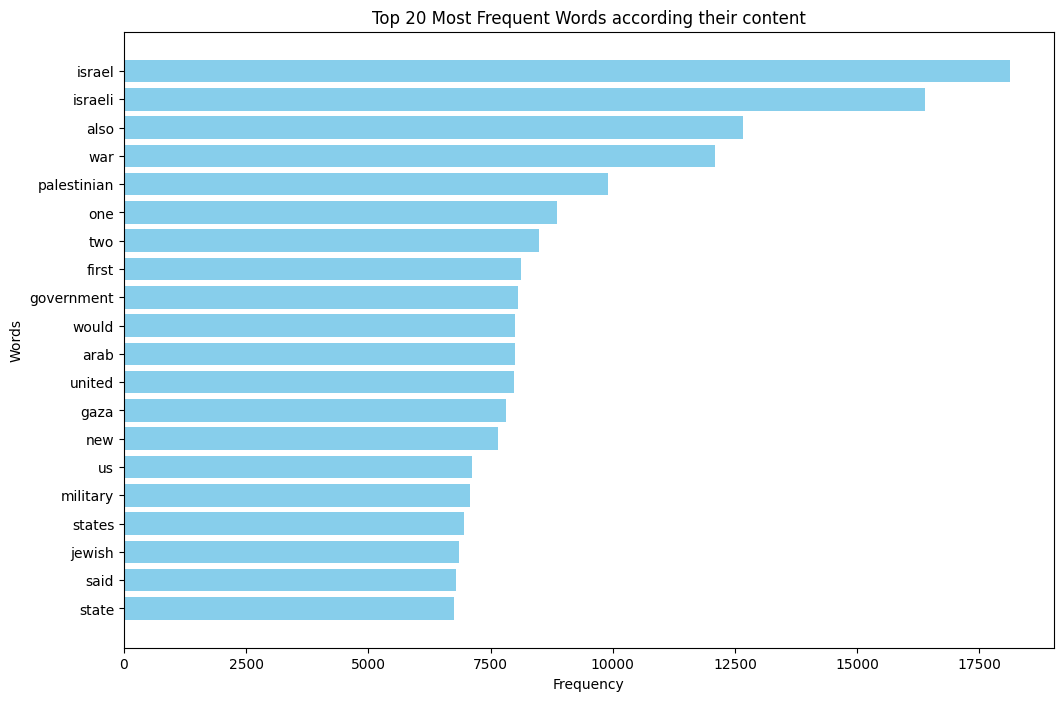

In [ ]:
all_words = ' '.join(df['Content_NoStopwords']).split()
word_freq = Counter(all_words)

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

top_20_words = word_freq_df.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_words['Word'], top_20_words['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words according their content')
plt.gca().invert_yaxis()
plt.show()

**Content Analysis:**

The most common words in the content without stopwords will reveal the key themes and entities discussed across the articles. These might include geopolitical terms, historical events, or organizations involved in the conflict.

#### Word cloud according the contect of documents

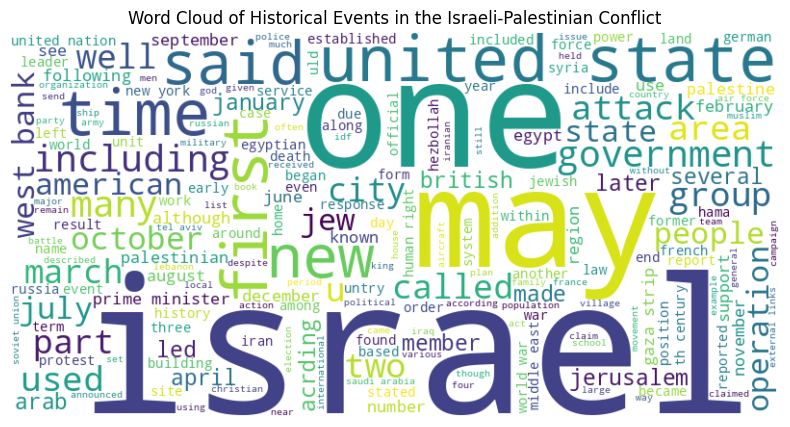

In [ ]:
if not df.empty:
    text = ' '.join(df['Content_NoStopwords'])
    if text.strip():  # Check if there is any text to create the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Historical Events in the Israeli-Palestinian Conflict')
        plt.show()
    else:
        print("No text available for word cloud generation.")

Let's say that the frequency of the word in the documents tells how much it is the main topic.
From this world cloud we can conclude that Israel is the main topic in this documents.
Also we can see that the sequence "united state" is writen very big in the word cloud, which means it appears frequently as well.
From this we can conclude that during the history of Israel it was very connected to the United States.

There is not much that can be deduced from this word cloud, so we would like to process the data a little more and thus focus it on the subject we want to investigate: the Israeli-Palestinian conflict

### The top 20 frequent words in all of the documents according to the title

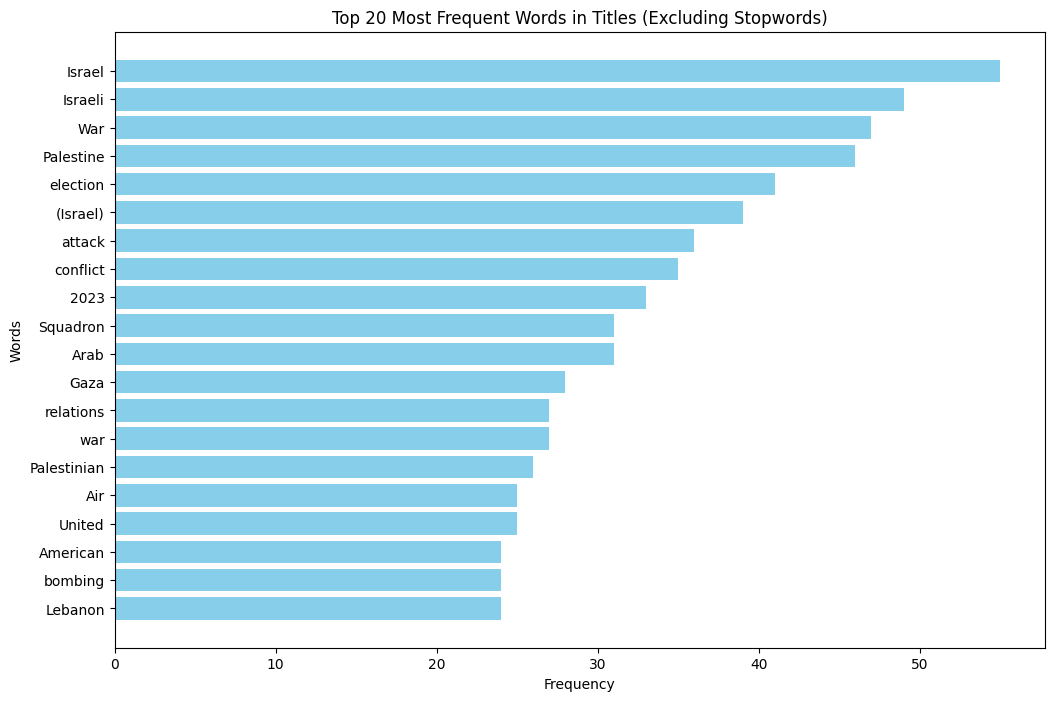

In [ ]:
all_words_title = ' '.join(df['title']).split()
filtered_words_title = [word for word in all_words_title if word.lower() not in stop_words]

word_freq_title = Counter(filtered_words_title)

word_freq_df_title = pd.DataFrame(word_freq_title.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

top_20_words_title = word_freq_df_title.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_words_title['Word'], top_20_words_title['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in Titles (Excluding Stopwords)')
plt.gca().invert_yaxis()
plt.show()

#### Word cloud according the title of the documents

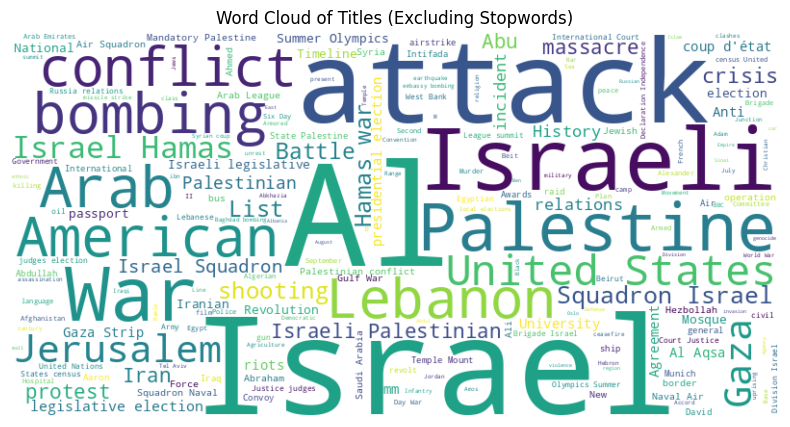

In [ ]:
filtered_text = ' '.join(filtered_words_title)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles (Excluding Stopwords)')
plt.show()

We decided to see the word cloud for the title of the documents instead of it's content. That is because the tilte already sum the information inside the files. and by building a word cloud for it we'll be able to see the topic of the titles.
From this word cloud we can conclude the next things:
1.  The United States is an integral part of the conflict whether directly or not.
2. In the coflict there is alot of violance and wars (from the appearence of words like attack, shooting, bombing, massacre, battle in the word cloud in a large font)
3. Also we can see that the arab countries such as Lebanon, Syria, Iran, Egypt are also came in this documents that are related to the conflict.


**The word cloud of the titles focused us a bit more.**

**Title Analysis:**

The most frequent words in the titles are likely to include common terms related to the Israel-Palestine conflict. Words like "Israel," "Palestine," "conflict," and possibly key figures' names or significant events will likely appear.


### Bigrams analysis
#### In here we would like to see what pair of words are shown the most in the content of the documents.

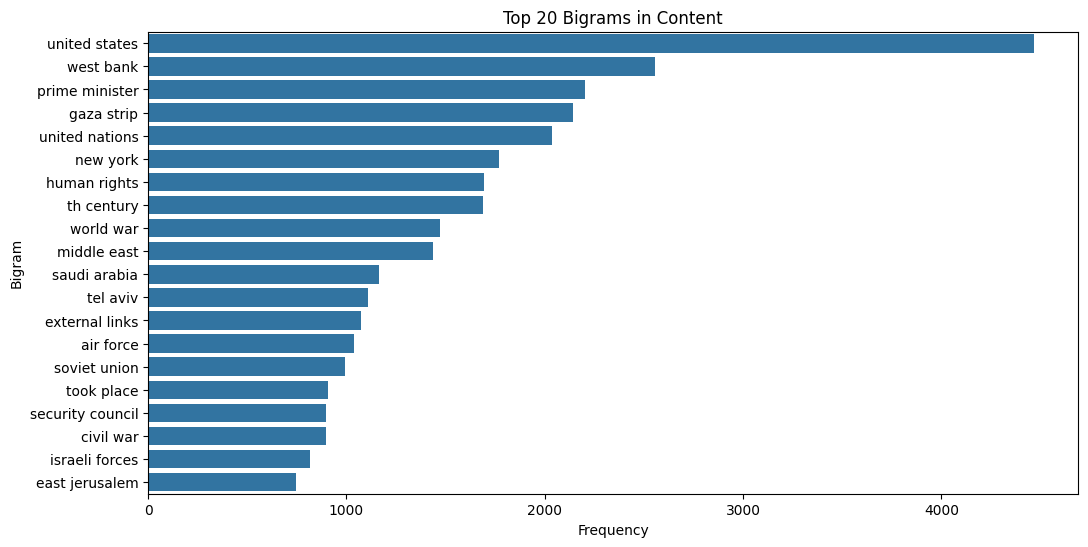

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['Content_NoStopwords'])
bigram_freq = bigram_matrix.sum(axis=0)
bigrams = [(bigram, bigram_freq[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:20]

bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df)
plt.title('Top 20 Bigrams in Content')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


The bigram analysis strengthened the assumption that the United State are very connected to the conflict (beacause of the amount of apearences in the documents content- wikipedia pages)

### Top 20 frequent Bigrams for a given keywords


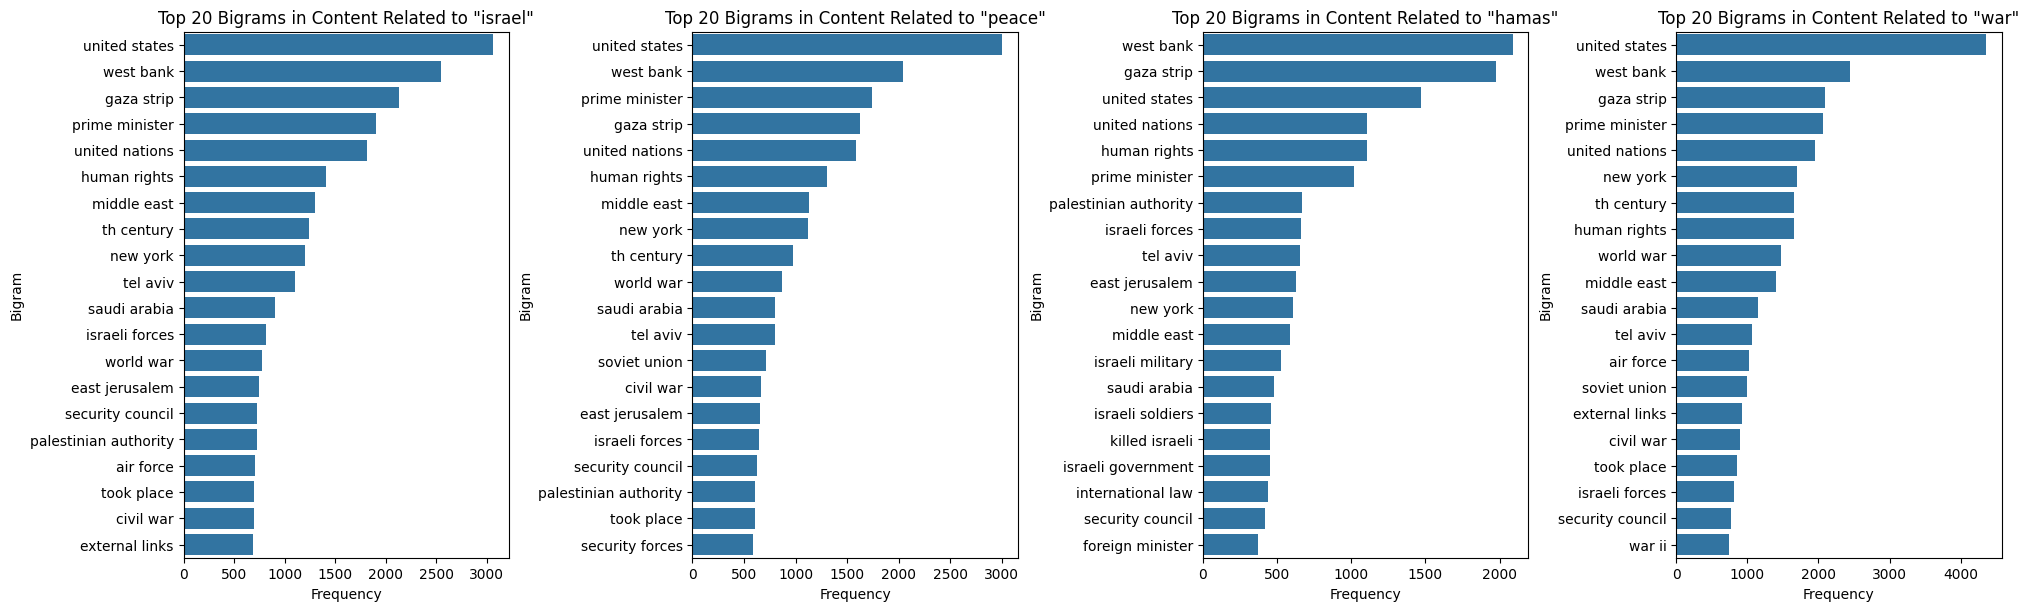

In [ ]:
def plot_top_bigrams_for_keywords(df, keywords, num_bigrams=20):
    num_keywords = len(keywords)
    fig, axes = plt.subplots(nrows=1, ncols=num_keywords, figsize=(5 * num_keywords, 6), constrained_layout=True)

    for ax, keyword in zip(axes, keywords):
        df_topic = df[df['content'].str.contains(keyword, case=False, na=False)]

        bigram_vectorizer_topic = CountVectorizer(ngram_range=(2, 2), stop_words='english')
        bigram_matrix_topic = bigram_vectorizer_topic.fit_transform(df_topic['Content_NoStopwords'])

        bigram_freq_topic = bigram_matrix_topic.sum(axis=0)
        bigrams_topic = [(bigram, bigram_freq_topic[0, idx]) for bigram, idx in bigram_vectorizer_topic.vocabulary_.items()]
        bigrams_topic = sorted(bigrams_topic, key=lambda x: x[1], reverse=True)[:num_bigrams]

        bigrams_topic_df = pd.DataFrame(bigrams_topic, columns=['Bigram', 'Frequency'])

        sns.barplot(x='Frequency', y='Bigram', data=bigrams_topic_df, ax=ax)
        ax.set_title(f'Top {num_bigrams} Bigrams in Content Related to "{keyword}"')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Bigram')

    plt.show()

keywords = ['israel', 'peace', 'hamas', 'war']
plot_top_bigrams_for_keywords(df, keywords)

The conclusions that can be drawn from above are:

1. **Common Bigram Across Topics**: Terms like "united states," "west bank," "gaza strip," and "human rights" appear frequently across different topics such as "israel," "peace," "hamas," and "war." This suggests that these are key themes or entities that are commonly discussed in the context of these topics.

2. **Regional Focus**: The appearance of geographical locations like "west bank," "gaza strip," and "tel aviv" indicates a strong focus on specific areas, pointing to the regional nature of the discussions. This highlights the significance of territorial and geopolitical issues in the discourse surrounding these topics.

3. **International Relations and Conflict**: The frequent mention of terms such as "united nations," "security council," and "civil war" suggests that these topics are often discussed in the context of international diplomacy, governance, and conflict. The involvement of international bodies and the theme of conflict resolution seem to be prevalent.

4. **Historical and War References**: The terms "world war," "air force," and "soviet union" indicate that historical context and military aspects are integral to discussions around these topics. This might suggest that historical events and military actions play a significant role in shaping the current narrative.

5. **Human Rights Concerns**: The recurring mention of "human rights" across multiple topics signifies that discussions are also focused on humanitarian issues. This highlights concerns about the impact of conflict and political decisions on human rights and civil liberties.

### Sentiment Analysis:

The sentiment analysis can show whether the articles tend to have a more neutral, positive, or negative tone.

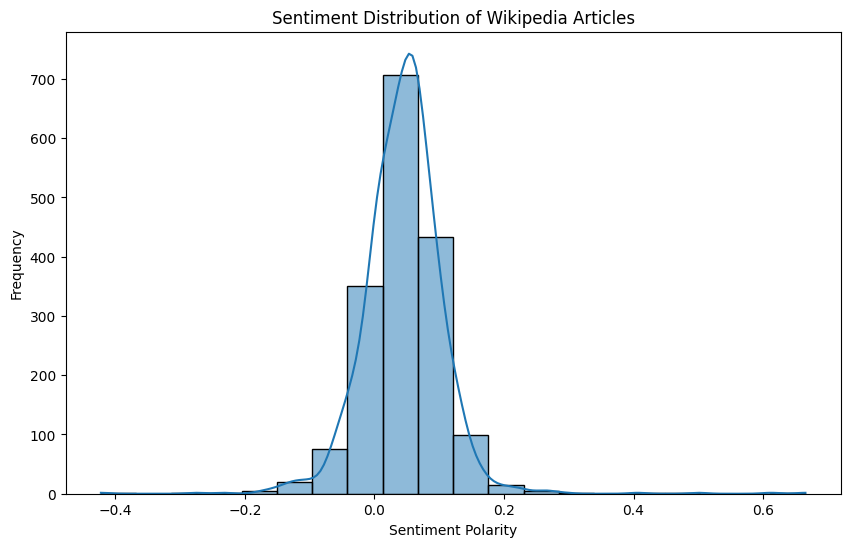

In [ ]:
df['Sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Wikipedia Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


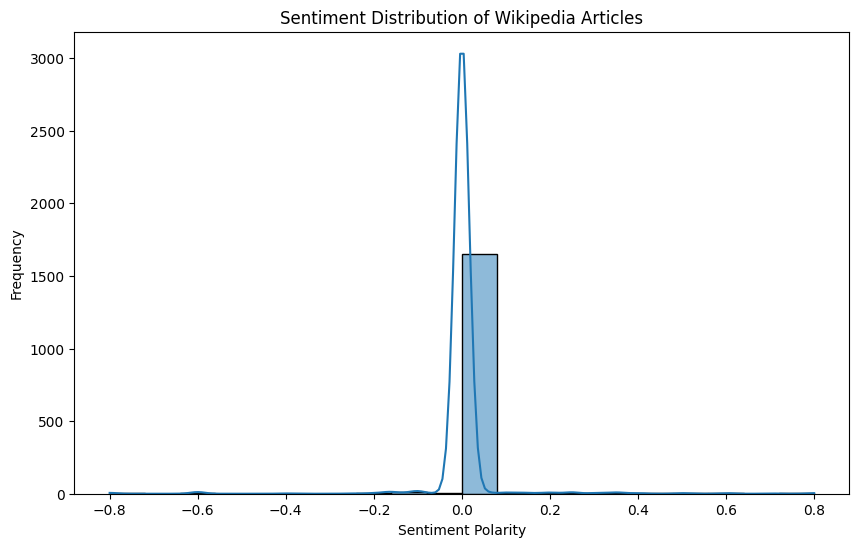

In [ ]:
df['Title_Sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['Title_Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Wikipedia Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


 We assumed that the topic we chose will give us a wide range of sentiment scores, reflecting the complexity and contentiousness of the subject. But on the contrary. most of the sentiment that were captured by the textblob library are neutral - positve.
 We investigated a bit more to understand what could cause it,  and we understood that sentiment analysis can sometimes misinterpret context. For instance, words that are neutral or positive in general use might be part of a negative context in the documents we've collected, but TextBlob might still give them a positive sentiment score. Words like “peace,” “agreement,” or “resolution” might skew the sentiment positively, even when used in articles discussing conflict.

It makes a bit sense, because one of the reasons why we chose the wikipedia as our source is because of it neutralism. So we can realy use the information we extracted right now.

**Who occures more with "human rights" in the documets?**

In [ ]:
df['content'] = df['content'].str.lower()

keywords_pair_1 = ['israel', 'human rights']
keywords_pair_2 = ['palestinians', 'human rights']

def count_co_occurrences(df, keywords):
    keyword1, keyword2 = keywords
    df_filtered = df[df['content'].str.contains(keyword1) & df['content'].str.contains(keyword2)]
    return df_filtered.shape[0]

count_pair_1 = count_co_occurrences(df, keywords_pair_1)
count_pair_2 = count_co_occurrences(df, keywords_pair_2)

print(f"Occurrences of 'Israel' and 'human rights': {count_pair_1}")
print(f"Occurrences of 'Palestinians' and 'human rights': {count_pair_2}")

if count_pair_1 > count_pair_2:
    print("The pair 'Israel' and 'human rights' appears more frequently.")
elif count_pair_1 < count_pair_2:
    print("The pair 'Palestinians' and 'human rights' appears more frequently.")
else:
    print("Both pairs appear with the same frequency.")

Occurrences of 'Israel' and 'human rights': 228
Occurrences of 'Palestinians' and 'human rights': 145
The pair 'Israel' and 'human rights' appears more frequently.


We can see that the word Israel occures more times with the sequence Human rights than the word palestiniens.

In order to check if its positive or negative we will do a sentiment analysis below.






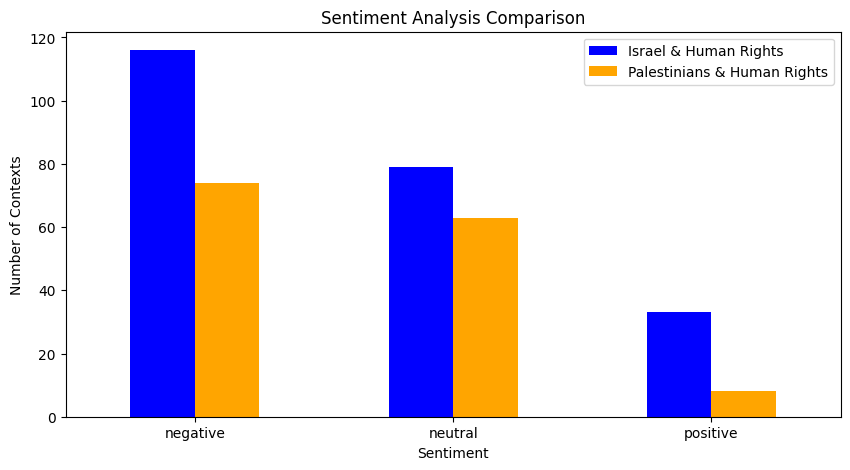

In [ ]:
df['content'] = df['content'].str.lower()

keywords_pair_1 = ['israel', 'human rights']
keywords_pair_2 = ['palestinians', 'human rights']

def count_and_extract_context(df, keywords):
    keyword1, keyword2 = keywords
    df_filtered = df[df['content'].str.contains(keyword1) & df['content'].str.contains(keyword2)].copy()
    df_filtered['context'] = df_filtered['content'].apply(
        lambda x: '. '.join([sentence for sentence in x.split('. ') if all(keyword in sentence for keyword in keywords)])
    )
    return df_filtered

df_pair_1 = count_and_extract_context(df, keywords_pair_1)
df_pair_2 = count_and_extract_context(df, keywords_pair_2)

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df_pair_1.loc[:, 'sentiment_score'] = df_pair_1['context'].apply(analyze_sentiment)
df_pair_2.loc[:, 'sentiment_score'] = df_pair_2['context'].apply(analyze_sentiment)

df_pair_1.loc[:, 'sentiment'] = df_pair_1['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)
df_pair_2.loc[:, 'sentiment'] = df_pair_2['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

sentiment_counts_pair_1 = df_pair_1['sentiment'].value_counts()
sentiment_counts_pair_2 = df_pair_2['sentiment'].value_counts()

sentiment_comparison = pd.DataFrame({
    'Israel & Human Rights': sentiment_counts_pair_1,
    'Palestinians & Human Rights': sentiment_counts_pair_2
}).fillna(0)

sentiment_comparison.plot(kind='bar', figsize=(10, 5), color=['blue', 'orange'])
plt.title('Sentiment Analysis Comparison')
plt.xlabel('Sentiment')
plt.ylabel('Number of Contexts')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

From this figure we can understand that the palestinian propaganda is working great.

###Topic Modeling


In [ ]:
texts = df['Content_NoStopwords'].tolist()

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)

terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])
    print("\n")

Topic #1:
['french', 'use', 'time', 'russian', 'century', 'city', 'world', 'used', 'new', 'th']


Topic #2:
['political', 'british', 'war', 'new', 'united', 'government', 'states', 'state', 'jewish', 'arab']


Topic #3:
['lebanese', 'aircraft', 'force', 'army', 'lebanon', 'military', 'air', 'hezbollah', 'forces', 'war']


Topic #4:
['attack', 'people', 'palestinians', 'killed', 'said', 'hamas', 'gaza', 'palestinian', 'israeli', 'israel']


Topic #5:
['century', 'jews', 'th', 'arab', 'population', 'temple', 'jewish', 'palestine', 'city', 'jerusalem']




Based on the output from the Latent Dirichlet Allocation (LDA) model, we can make several observations about the topics present in the text data. LDA is a topic modeling technique that identifies themes or topics within a collection of documents. Here are the conclusions from the identified topics:

Topic Analysis:

	1.	Topic #1:
	•	Keywords: ‘french’, ‘use’, ‘time’, ‘russian’, ‘century’, ‘city’, ‘world’, ‘used’, ‘new’, ‘th’
	•	Possible Theme: This topic seems to revolve around general historical and cultural references, possibly related to time periods, global influences, and key cities. It mentions both ‘french’ and ‘russian’, indicating a potential focus on historical or cultural interactions involving these nations, perhaps in a global context.
	2.	Topic #2:
	•	Keywords: ‘political’, ‘british’, ‘war’, ‘new’, ‘united’, ‘government’, ‘states’, ‘state’, ‘jewish’, ‘arab’
	•	Possible Theme: This topic is centered on politics and conflicts, with a focus on international relations. It mentions ‘british’, ‘war’, ‘government’, ‘states’, ‘jewish’, and ‘arab’, suggesting a theme around historical or ongoing political dynamics involving these groups and nations, possibly in the context of the Middle East.
	3.	Topic #3:
	•	Keywords: ‘lebanese’, ‘aircraft’, ‘force’, ‘army’, ‘lebanon’, ‘military’, ‘air’, ‘hezbollah’, ‘forces’, ‘war’
	•	Possible Theme: This topic is clearly focused on military conflicts, particularly those involving Lebanon. The presence of ‘lebanese’, ‘hezbollah’, and ‘forces’ indicates discussions around military actions, possibly involving air force operations and conflicts in Lebanon or with Lebanese factions.
	4.	Topic #4:
	•	Keywords: ‘attack’, ‘people’, ‘palestinians’, ‘killed’, ‘said’, ‘hamas’, ‘gaza’, ‘palestinian’, ‘israeli’, ‘israel’
	•	Possible Theme: This topic is centered on violence and conflict, specifically in the context of the Israeli-Palestinian conflict. The keywords ‘attack’, ‘killed’, ‘hamas’, ‘gaza’, ‘palestinian’, ‘israeli’, and ‘israel’ suggest discussions around specific incidents, attacks, and the broader conflict in Gaza and Israel.
	5.	Topic #5:
	•	Keywords: ‘century’, ‘jews’, ‘th’, ‘arab’, ‘population’, ‘temple’, ‘jewish’, ‘palestine’, ‘city’, ‘jerusalem’
	•	Possible Theme: This topic seems to focus on historical and cultural aspects, particularly related to Jewish history and the city of Jerusalem. The presence of ‘jews’, ‘temple’, ‘jerusalem’, ‘palestine’, and ‘arab’ indicates discussions around religious and cultural heritage, demographics, and historical claims, especially in relation to Jerusalem.

General Conclusions:

	•	The dataset appears to cover a wide range of topics, primarily centered around historical, political, and military themes.
	•	Several topics (Topics #2, #3, #4, and #5) relate directly to the Middle East, indicating a strong focus on issues such as the Israeli-Palestinian conflict, Lebanon’s military situation, and broader geopolitical dynamics in the region.
	•	The presence of words like ‘government’, ‘state’, ‘forces’, and ‘war’ across multiple topics suggests that the dataset includes content related to state affairs, military operations, and conflicts.
	•	Topics also touch on historical and cultural discussions, as seen in references to time periods, specific cities, and religious groups.

These conclusions provide insights into the thematic structure of the dataset, reflecting significant political, military, and cultural concerns, particularly related to the Middle East and historical narratives.

## Name entity recognition


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content_NoStopwords'])

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

top_n = 10
top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    indices = np.argsort(tfidf_matrix[i].toarray()[0])[::-1][:top_n]
    top_keywords.append([tfidf_feature_names[index] for index in indices])

df['top_keywords'] = top_keywords

df[['title', 'top_keywords']].head()

,title,top_keywords
0,Ahmad Asiri (general),"[military, attacks, human, rights, war, area, ..."
1,Air India,"[air, international, new, january, took, gover..."
2,Albania–Israel relations,"[israel, jewish, minister, war, jews, israeli,..."
3,Algeria–Israel relations,"[israel, palestinian, israeli, war, president,..."
4,Algeria–Saudi Arabia relations,"[arab, war, president, november, support, poli..."


This code uses a TF-IDF vectorizer to extract the top 10 most relevant keywords from each document in a text dataset. It first transforms the text data into a TF-IDF matrix, then identifies the top keywords for each document based on the highest TF-IDF scores. These top keywords are added as a new column to the original DataFrame, allowing for analysis of the main topics present in the text data.

In [ ]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf_matrix)

for index, topic in enumerate(nmf.components_):
    print(f"Topic #{index + 1}:")
    print([tfidf_feature_names[i] for i in topic.argsort()[-10:]])
    print("\n")

Topic #1:
['state', 'people', 'party', 'president', 'international', 'national', 'states', 'united', 'new', 'government']


Topic #2:
['attacks', 'palestinians', 'idf', 'killed', 'attack', 'hamas', 'gaza', 'palestinian', 'israel', 'israeli']


Topic #3:
['history', 'new', 'university', 'th', 'city', 'century', 'israel', 'jews', 'jerusalem', 'jewish']


Topic #4:
['world', 'military', 'british', 'th', 'used', 'force', 'forces', 'army', 'air', 'war']


Topic #5:
['area', 'west', 'state', 'syria', 'land', 'british', 'population', 'palestinian', 'arab', 'palestine']




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


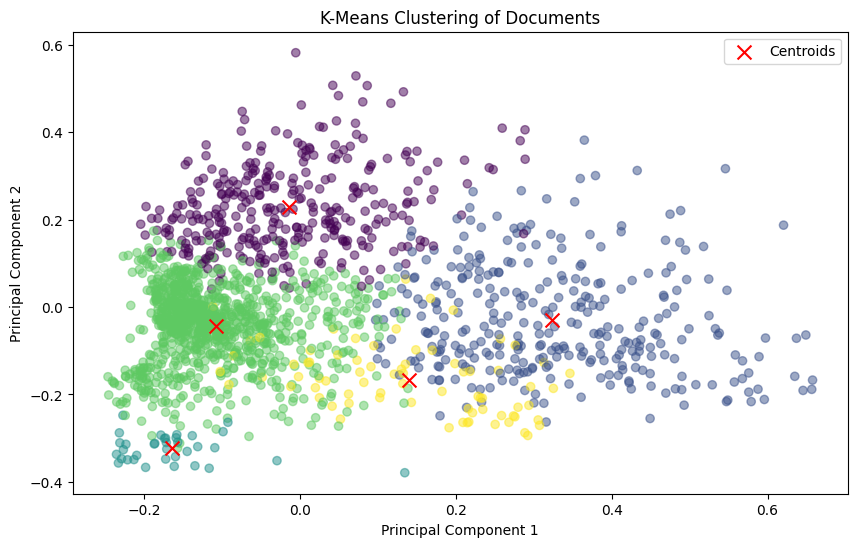


Cluster 0 keywords:
['jewish', 'palestine', 'jerusalem', 'arab', 'jews', 'israel', 'village', 'city', 'temple', 'hebrew']
Sample documents from Cluster 0:
['Antisemitism in the Arab world', 'Albal', 'Books of Samuel']

Cluster 1 keywords:
['israeli', 'palestinian', 'israel', 'gaza', 'hamas', 'attack', 'palestinians', 'killed', 'strip', 'idf']
Sample documents from Cluster 1:
['Albania–Israel relations', 'Algeria–Israel relations', 'Angola–Israel relations']

Cluster 2 keywords:
['squadron', 'air', 'aircraft', 'force', 'operation', 'war', 'naval', 'israeli', 'royal', 'training']
Sample documents from Cluster 2:
['193 Squadron (Israel)', '1st Cruiser Squadron', '800 Naval Air Squadron']

Cluster 3 keywords:
['war', 'new', 'government', 'united', 'states', 'national', 'th', 'military', 'world', 'international']
Sample documents from Cluster 3:
['Ahmad Asiri (general)', 'Air India', 'Algeria–Saudi Arabia relations']

Cluster 4 keywords:
['lebanon', 'lebanese', 'hezbollah', 'israeli', 'isr

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content_NoStopwords'])

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['cluster'] = kmeans.labels_

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering of Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

for i in range(num_clusters):
    print(f"\nCluster {i} keywords:")
    cluster_center = kmeans.cluster_centers_[i]
    sorted_indices = cluster_center.argsort()[::-1]
    terms = tfidf_vectorizer.get_feature_names_out()
    top_terms = [terms[index] for index in sorted_indices[:10]]
    print(top_terms)

    print(f"Sample documents from Cluster {i}:")
    sample_docs = df[df['cluster'] == i].head(3)['title'].tolist()  # Displaying 3 sample titles from each cluster
    print(sample_docs)

This diagram displays the identities of the files and their similarities based on K-means clustering.

The first cluster includes files that deal with military operations and armed forces.
The second cluster primarily relates to the topics of antisemitism and the Israeli-Palestinian conflict, as the keywords are heavily associated with these subjects.
The third cluster has a more political theme.
The fourth cluster is more associated with the battles between Hamas and Israel, grouping together files containing related content.
The fifth cluster provides more information about military forces or equipment and includes files whose content revolves around these topics.

# Extracting the documents that contain the words israel, palestine and arab

In [ ]:
mask_israel = df['title'].str.contains(r'\bIsrael\w*', case=False) | df['content'].str.contains(r'\bIsrael\w*', case=False)

mask_palestin = df['title'].str.contains(r'\bPalestin\w*', case=False) | df['content'].str.contains(r'\bPalestin\w*', case=False)

mask_arab = df['title'].str.contains(r'\bArab\w*', case=False) | df['content'].str.contains(r'\bArab\w*', case=False)


mask_combined = mask_israel & mask_palestin & mask_arab

df_combined = df[mask_combined][['title', 'content']]

num_combined_docs = df_combined.shape[0]

print(f"Number of documents containing 'Israel' and 'Palestin' and 'Arab' : {num_combined_docs}")

Number of documents containing 'Israel' and 'Palestin' and 'Arab' : 596


In [ ]:
df_combined

,title,content
2,Albania–Israel relations,albania has regnized israel as a state since a...
3,Algeria–Israel relations,algeria and israel have no official diplomatic...
7,Antisemitism in the Arab world,antisemitism prejudice against and hatred of j...
8,Anwar Sadat,muhammad anwar es-sadat december october ) was...
9,Arab Peace Initiative,the arab peace initiative arabic: مبادرة السلا...
...,...,...
1703,Battle of Jenin (2002),"the battle of jenin, took place in the jenin r..."
1704,Iran–Israel relations,the relations between iran and israel are divi...
1706,2008 Israel–Hezbollah prisoner exchange,the israel–hezbollah prisoner exchange took pl...
1714,Israel–Saudi Arabia relations,the state of israel and the kingdom of saudi a...


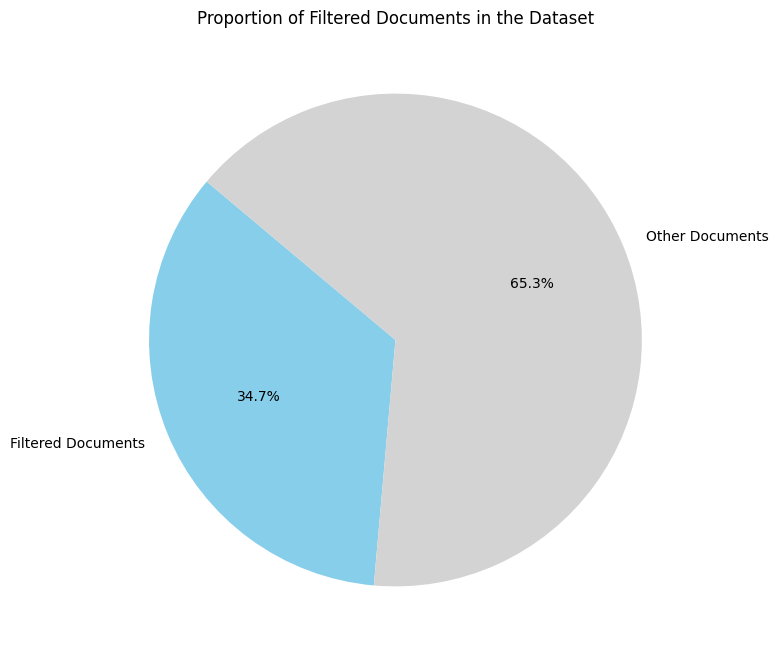

In [ ]:
total_docs = df.shape[0]
filtered_docs = num_combined_docs
other_docs = total_docs - filtered_docs

labels = ['Filtered Documents', 'Other Documents']
sizes = [filtered_docs, other_docs]
colors = ['skyblue', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Filtered Documents in the Dataset')
plt.show()



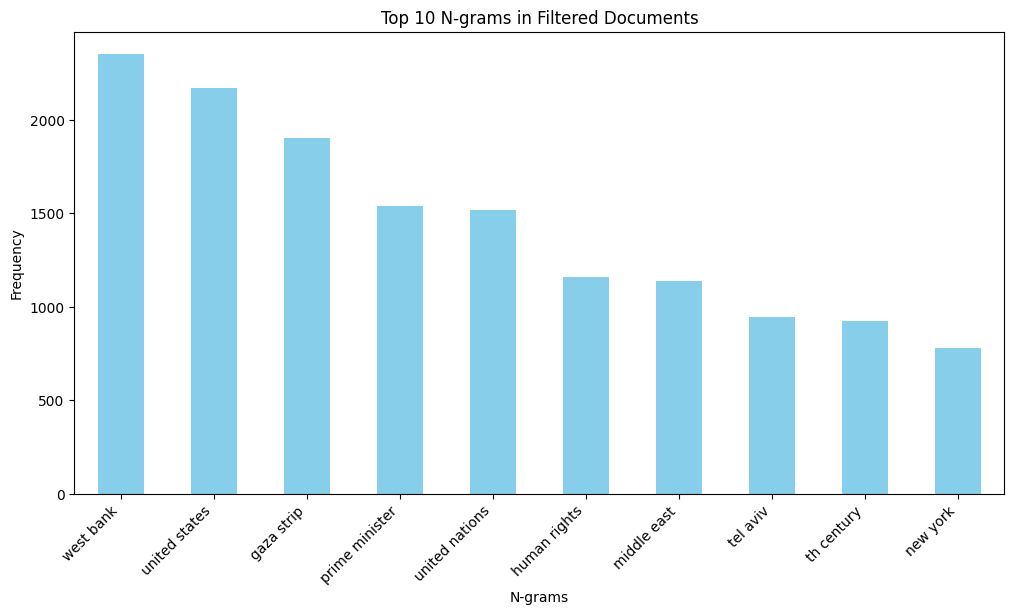

In [ ]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', lowercase=True)
X_ngrams = ngram_vectorizer.fit_transform(df_combined['content'])

ngram_freq = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())

top_ngrams = ngram_freq.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_ngrams.plot(kind='bar', color='skyblue')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title('Top 10 N-grams in Filtered Documents')
plt.xticks(rotation=45, ha='right')
plt.show()


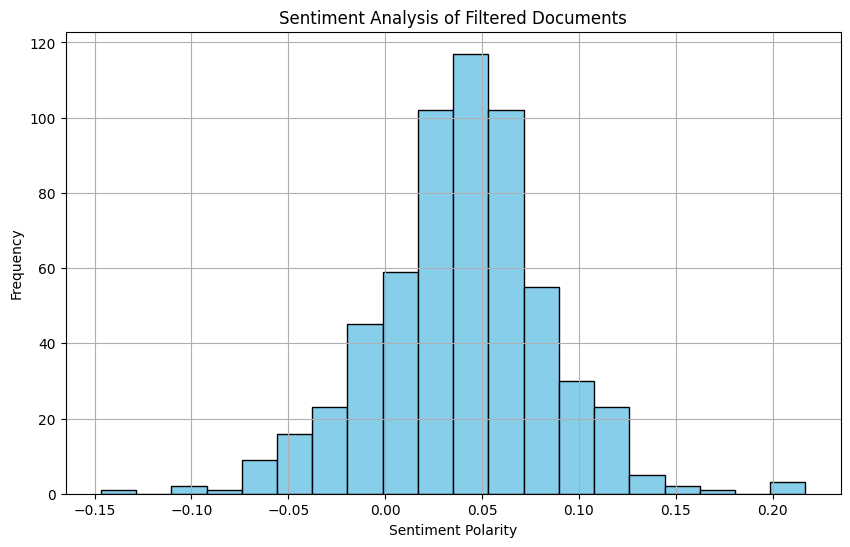

In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_combined['sentiment'] = df_combined['content'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
plt.hist(df_combined['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Filtered Documents')
plt.grid(True)
plt.show()


#Summary of part 1
### We did some research on the information we gathered from Wikipedia in order to understand what we are dealing with here.
### We checked if the documents discuss the topic of Israel / Palestine as we wanted and it did. We found the things that connected to both of them such as west bank and gaza strip and so on.
### About the sentiment analysis we didnt find something in particuler. The content is written in such a way that it is impossible to understand whether it is positive or negative. it only prooves that the content in wikipedia is neutral.
### In the end we tried to see how many documents contain the words "Israel", "Palestine" and "Arab", and we so that only 596 from 1716 documents contain all 3 words together. But we couldn't deducte something specific from it, because the 2 metrics we checked such as semanthic analysis and N-grams gave almost the same result as it did for the whole data/


# **Part 2**
Our model was built by fine tuning existing model, at first we fine tuned the **gpt2 model**. Because we didn't get good results we decided to fine tune another model the **TinyLlaMA model**. in the second model our training loss was very low so we belived our model will be more accurate, but still it wasnt able to retrive us logical answers to the questions we ask him.
To make them more accurate, we need to perform additional fine-tuning, or we need to collect the information from Wikipedia more accurately.

**Below you'll be able to see the models in action.**

## Loading the fine tuned models

In [ ]:
set_seed(42)

gpt2_checkpoint = "./yarden/fine_tuned_gpt2_v0.1/checkpoint-2500"
tinyllama_checkpoint = "./ester/fine_tuned_tinyllama_v0.1/checkpoint-5526"

gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_checkpoint, use_safetensors=True)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_generator = pipeline('text-generation', model=gpt2_model, tokenizer=gpt2_tokenizer)

tinyllama_model = AutoModelForCausalLM.from_pretrained(tinyllama_checkpoint)
tinyllama_tokenizer = AutoTokenizer.from_pretrained("./ester/fine_tuned_tinyllama_v0.1")
tinyllama_generator = pipeline('text-generation', model=tinyllama_model, tokenizer=tinyllama_tokenizer)



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

## Sending the models questions to see their answers

In [ ]:
questions = [
    "What is the cause for the conflict between the Israeli and the Arab people?",
    "Who started the Yom Kippur War?",
    "What are the key differences between Judaism and Islam?",
    "who wanted peace more, jewish people or arabs?",
    "imortance of the temple mount to the judaism and the islam?",
    "is there aparthide in israel?"
]

results = []

for question in questions:
    gpt2_output = gpt2_generator(
        question,
        max_length=150,
        num_return_sequences=1,
        temperature=0.2,
        top_p=0.9,
        top_k=50,
        repetition_penalty=1.2,
        truncation=True
    )[0]['generated_text']

    tinyllama_output = tinyllama_generator(
        question,
        max_length=150,
        num_return_sequences=1,
        temperature=0.2,
        top_p=0.9,
        top_k=50,
        repetition_penalty=1.2,
        truncation=True
    )[0]['generated_text']

    results.append({
        "Question": question,
        "GPT-2 Answer": gpt2_output,
        "TinyLLaMA Answer": tinyllama_output
    })

models_df = pd.DataFrame(results)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token

In [ ]:
models_df

,Question,GPT-2 Answer,TinyLLaMA Answer
0,What is the cause for the conflict between the...,What is the cause for the conflict between the...,What is the cause for the conflict between the...
1,Who started the Yom Kippur War?,Who started the Yom Kippur War? The Arab Sprin...,Who started the Yom Kippur War? The answer to ...
2,What are the key differences between Judaism a...,What are the key differences between Judaism a...,What are the key differences between Judaism a...
3,"who wanted peace more, jewish people or arabs?","who wanted peace more, jewish people or arabs?...","who wanted peace more, jewish people or arabs?..."
4,imortance of the temple mount to the judaism a...,imortance of the temple mount to the judaism a...,imortance of the temple mount to the judaism a...
5,is there aparthide in israel?,is there aparthide in israel? The answer to th...,is there aparthide in israel? Are there Jews w...


 Due to the lack of precision encountered with both models, we realized that we cannot currently implement the general idea of building a question-and-answer model. Therefore, we decided, for now, to compare the two models and see which one is more accurate and in what aspects.

## **Comparison between the models**

In [ ]:
def preprocess(text):
    return nltk.word_tokenize(text.lower())

def compute_cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def keyword_matching(reference, candidate):
    reference_tokens = set(preprocess(reference))
    candidate_tokens = set(preprocess(candidate))
    common_tokens = reference_tokens.intersection(candidate_tokens)
    return len(common_tokens) / len(reference_tokens)

rouge = Rouge()

def compute_rouge(reference, candidate):
    scores = rouge.get_scores(candidate, reference, avg=True)
    return scores['rouge-l']['f']

# all_files = os.listdir("./wikipedia_data")

# random_files = random.sample(all_files, 10)

results = []

titles = [ "Arab–Israeli conflict",
                "Israeli–Palestinian conflict",
                "Israeli Declaration of Independence",
                 "Six-Day War","Gulf War",
                 "Israel–Hamas war",
                 "2006 Lebanon War",
                 "1982 Lebanon War",
                 "2024 Iran–Israel conflict",
                 "Iran–Israel proxy conflict",
                 "Israel–Hezbollah conflict",
                 "Yom Kippur War",
                 "2014 Gaza War",
                 "History of Israel",
                 "History of Palestine",
                 "2023 Hamas-led attack on Israel",
                "2014 Gush Etzion kidnapping and murder",
                 "Temple Mount",
                "First Intifada",
                 "Second Intifada",
                 "Munich massacre",
                 "Borders of Israel",
                 "Convoy of 35",
                 "Palestine Liberation Organization",
                 "Abraham Accords",
                 "Oslo Accords",
                 "Mandatory Palestine"]

wikipedia_data_dir = "./wikipedia_data"

title_content_dict = {}

for file_name in os.listdir(wikipedia_data_dir):
    file_path = os.path.join(wikipedia_data_dir, file_name)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        title = data.get('title')

        if title in titles:
            title_content_dict[title] = data.get('content')

            question = f"tell me about {title}"

            gpt2_output = gpt2_generator(
                question,
                max_length=150,
                num_return_sequences=1,
                temperature=0.2,
                top_p=0.9,
                top_k=50,
                repetition_penalty=1.2,
                truncation=True
            )[0]['generated_text']

            tinyllama_output = tinyllama_generator(
                question,
                max_length=150,
                num_return_sequences=1,
                temperature=0.2,
                top_p=0.9,
                top_k=50,
                repetition_penalty=1.2,
                truncation=True
            )[0]['generated_text']

            cosine_gpt2 = compute_cosine_similarity(content, gpt2_output)
            keyword_gpt2 = keyword_matching(content, gpt2_output)
            rouge_gpt2 = compute_rouge(content, gpt2_output)

            cosine_tinyllama = compute_cosine_similarity(content, tinyllama_output)
            keyword_tinyllama = keyword_matching(content, tinyllama_output)
            rouge_tinyllama = compute_rouge(content, tinyllama_output)

            results.append({
                "Title": title,
                "Model": "GPT-2",
                "Cosine Similarity": cosine_gpt2,
                "Keyword Matching": keyword_gpt2,
                "ROUGE-L": rouge_gpt2
            })
            results.append({
                "Title": title,
                "Model": "TinyLLaMA",
                "Cosine Similarity": cosine_tinyllama,
                "Keyword Matching": keyword_tinyllama,
                "ROUGE-L": rouge_tinyllama
            })


comparison_df = pd.DataFrame(results)




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `d

In [ ]:
comparison_df

,Title,Model,Cosine Similarity,Keyword Matching,ROUGE-L
0,Convoy of 35,GPT-2,0.199835,0.18125,0.162162
1,Convoy of 35,TinyLLaMA,0.364586,0.10625,0.098765
2,Second Intifada,GPT-2,0.248471,0.20625,0.166667
3,Second Intifada,TinyLLaMA,0.496659,0.09375,0.078431
4,Temple Mount,GPT-2,0.212353,0.21250,0.180000
5,Temple Mount,TinyLLaMA,0.294257,0.13750,0.114504
6,First Intifada,GPT-2,0.224635,0.21875,0.197952
7,First Intifada,TinyLLaMA,0.327588,0.13125,0.122137
8,Palestine Liberation Organization,GPT-2,0.233303,0.19375,0.161616
9,Palestine Liberation Organization,TinyLLaMA,0.437096,0.14375,0.154440


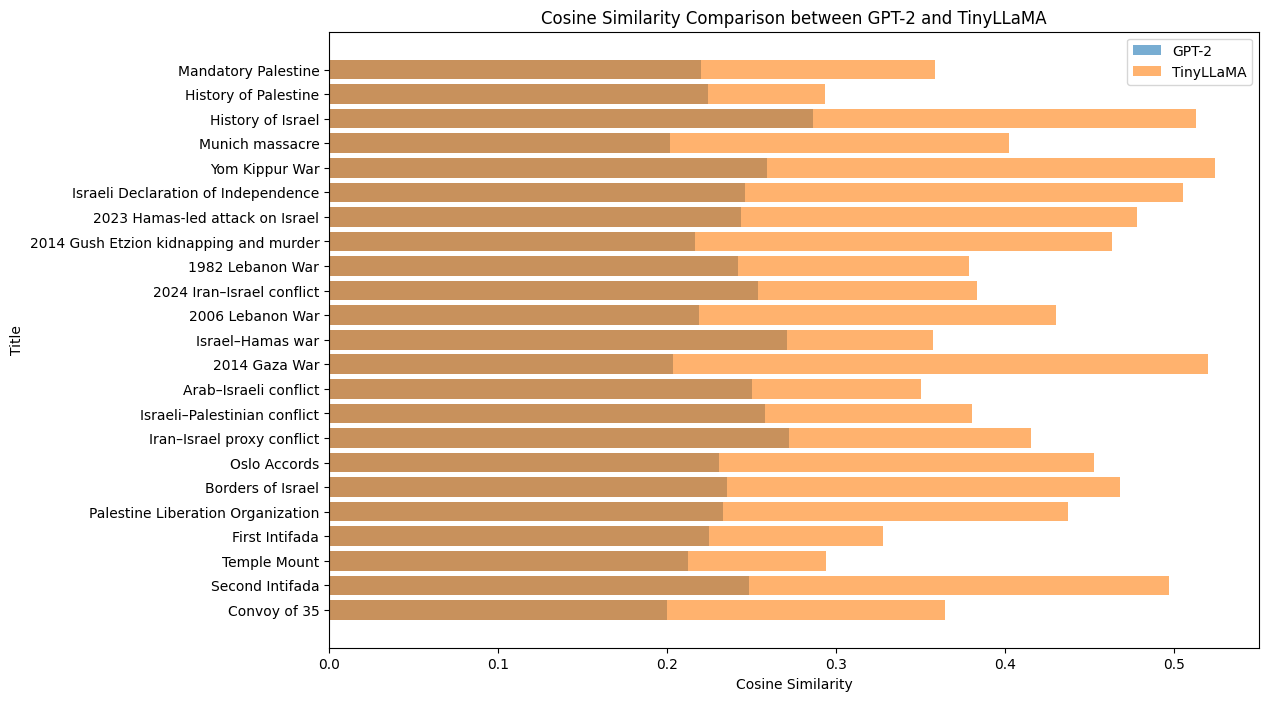

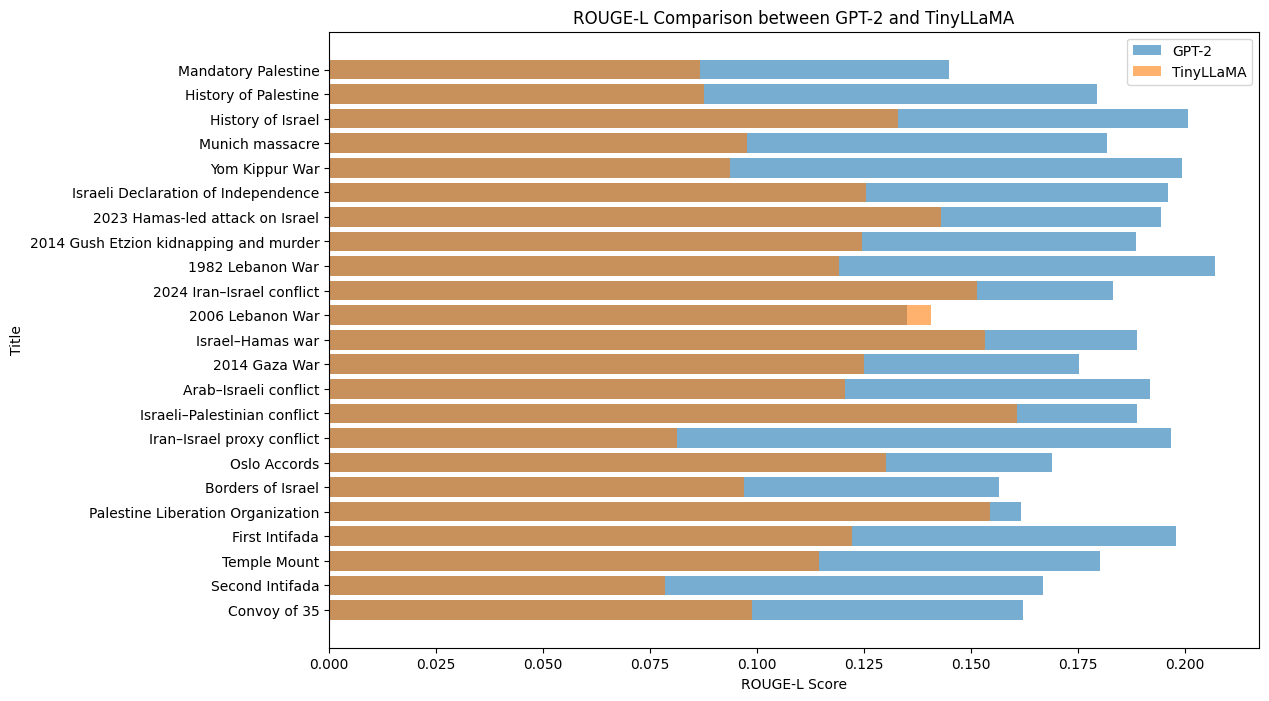

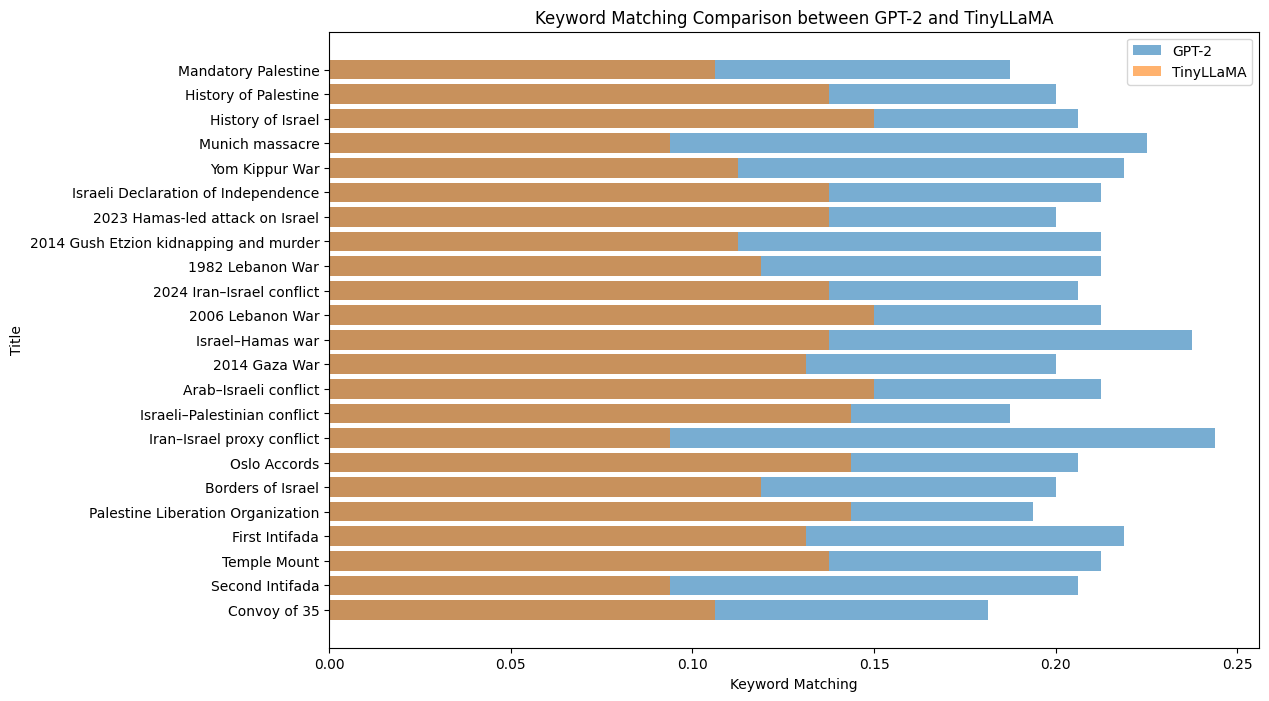

In [ ]:
plt.figure(figsize=(12, 8))
for model in ["GPT-2", "TinyLLaMA"]:
    subset = comparison_df[comparison_df["Model"] == model]
    plt.barh(subset["Title"], subset["Cosine Similarity"], label=model, alpha=0.6)
plt.xlabel("Cosine Similarity")
plt.ylabel("Title")
plt.title("Cosine Similarity Comparison between GPT-2 and TinyLLaMA")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for model in ["GPT-2", "TinyLLaMA"]:
    subset = comparison_df[comparison_df["Model"] == model]
    plt.barh(subset["Title"], subset["ROUGE-L"], label=model, alpha=0.6)
plt.xlabel("ROUGE-L Score")
plt.ylabel("Title")
plt.title("ROUGE-L Comparison between GPT-2 and TinyLLaMA")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for model in ["GPT-2", "TinyLLaMA"]:
    subset = comparison_df[comparison_df["Model"] == model]
    plt.barh(subset["Title"], subset["Keyword Matching"], label=model, alpha=0.6)
plt.xlabel("Keyword Matching")
plt.ylabel("Title")
plt.title("Keyword Matching Comparison between GPT-2 and TinyLLaMA")
plt.legend()
plt.show()


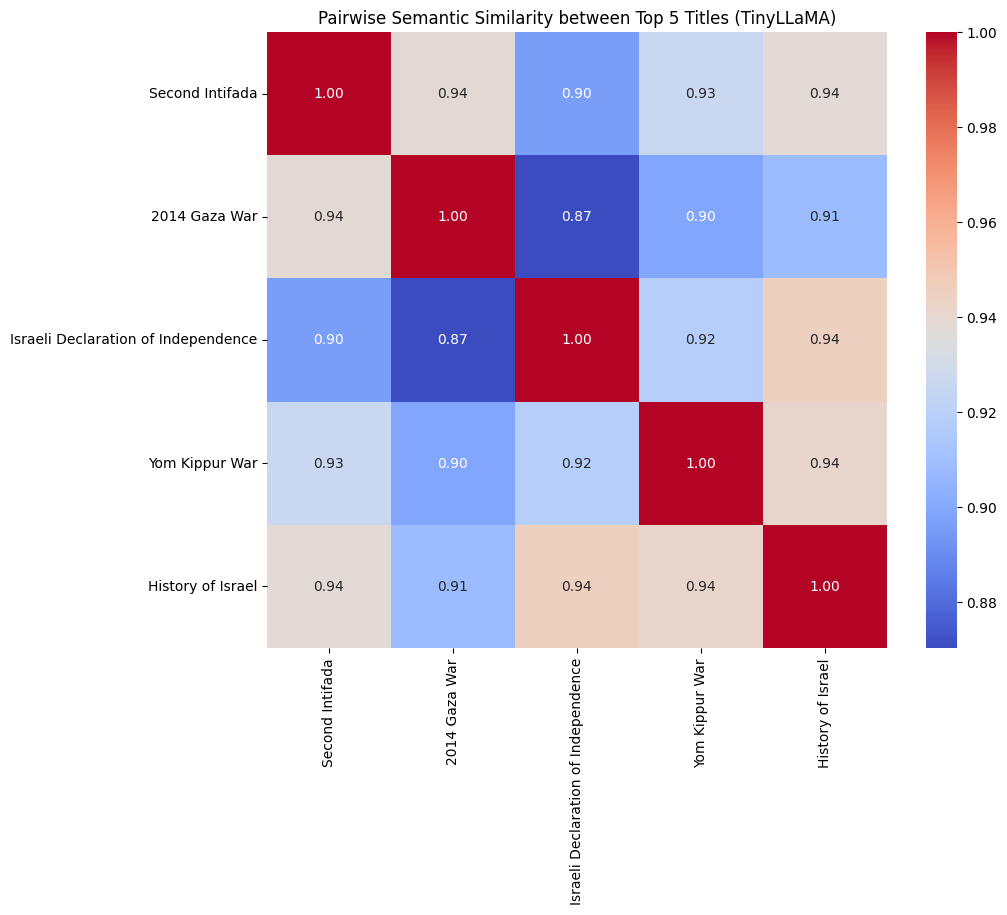

<ipython-input-39-ee53fe358793>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="viridis")


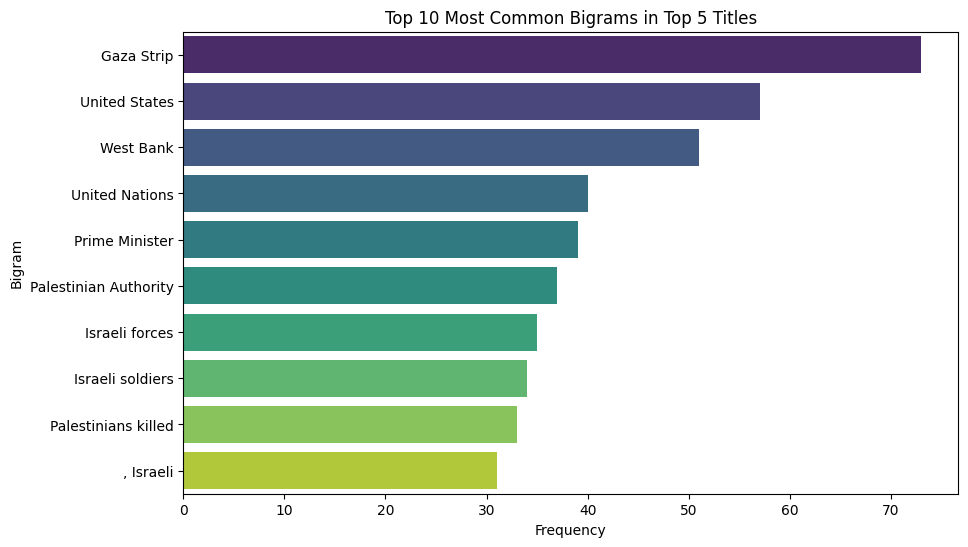

In [ ]:
def get_bigrams(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    bigrams = ngrams(filtered_tokens, 2)
    return [' '.join(bigram) for bigram in bigrams]


top_5_titles = comparison_df[comparison_df["Model"] == "TinyLLaMA"].nlargest(5, "Cosine Similarity")["Title"].tolist()

wikipedia_data_dir = "./wikipedia_data"
top_5_content = {}

for file_name in os.listdir(wikipedia_data_dir):
    file_path = os.path.join(wikipedia_data_dir, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        title = data.get('title')
        if title in top_5_titles:
            top_5_content[title] = data.get('content')

content_list = list(top_5_content.values())
titles_list = list(top_5_content.keys())

vectorizer = TfidfVectorizer().fit_transform(content_list)
vectors = vectorizer.toarray()
pairwise_similarity = cosine_similarity(vectors)
similarity_df = pd.DataFrame(pairwise_similarity, index=titles_list, columns=titles_list)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Semantic Similarity between Top 5 Titles (TinyLLaMA)")
plt.show()

all_bigrams = []
for content in content_list:
    all_bigrams.extend(get_bigrams(content))

bigram_counter = Counter(all_bigrams)
top_bigrams = bigram_counter.most_common(10)

bigram_df = pd.DataFrame(top_bigrams, columns=["Bigram", "Frequency"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="viridis")
plt.title("Top 10 Most Common Bigrams in Top 5 Titles")
plt.show()


The Tiny Llama model is more accurate in terms of cosine similarity but less accurate concerning the other two metrics. Since the other model does not significantly outperform it in these metrics, we chose to focus on the cosine similarity results for the Tiny Llama model. We took the five titles with the highest cosine similarity and created a heatmap to see how interconnected these five topics are. We found that they are very closely related, as the values in the heatmap do not drop below 0.87.

Additionally, we presented the ten most frequently appearing words in these five files. The winner is "Gaza Strip".

From that we can understand that the "Gaza strip" is one of the main topics in thos 5 documents.

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/כלים מתקדמים - יניב/Data_project_EDA.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/כלים מתקדמים - יניב/Data_project_EDA.ipynb to pdf
[NbConvertApp] Support files will be in Data_project_EDA_files/
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making directory ./Data_project_EDA_files
[NbConvertApp] Making director